In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import kstest
import statsmodels.api as sm

# Load data
df = pd.read_csv("Your_cowpea_data.csv").drop(columns="In_Moisture")
X = df.drop(columns="Water_Absorbed")
y = df["Water_Absorbed"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[["Time", "Temp"]] = scaler.fit_transform(X_train[["Time", "Temp"]])
X_test[["Time", "Temp"]] = scaler.transform(X_test[["Time", "Temp"]])

# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=9),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse',
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Predictions
y_pred = model.predict(X_test).squeeze()

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
residuals = y_test - y_pred

# Akaike Information Criterion (AIC)
n_params = model.count_params()
n = len(y_test)
ssr = np.sum(residuals**2)
log_likelihood = -0.5 * n * (np.log(2 * np.pi) + np.log(ssr/n)) - 0.5 * n
aic = 2 * n_params - 2 * log_likelihood

# Kolmogorov-Smirnov test for normality
ks_stat, ks_p = kstest(residuals, 'norm')

print(f"""
Model Fitness:
- R²: {r2:.3f}
- RMSE: {rmse:.3f}
- AIC: {aic:.1f}
- KS Test p-value: {ks_p:.3f}
""")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Model Fitness:
- R²: 0.640
- RMSE: 0.370
- AIC: 5589.1
- KS Test p-value: 0.000



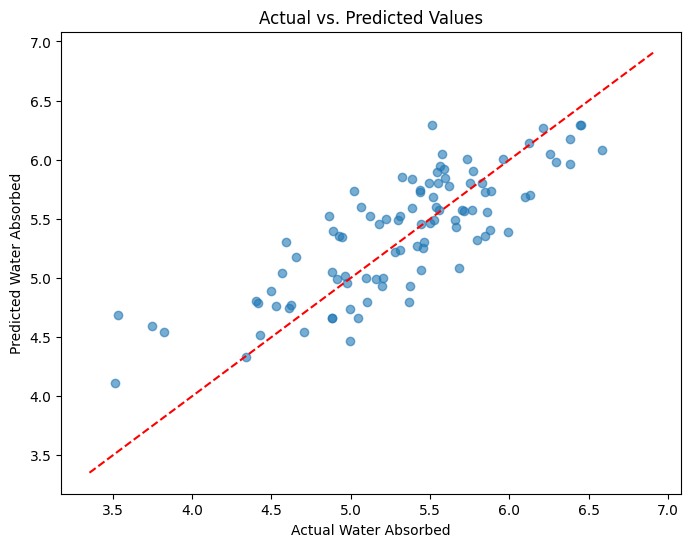

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Water Absorbed")
plt.ylabel("Predicted Water Absorbed")
plt.title("Actual vs. Predicted Values")
plt.show()

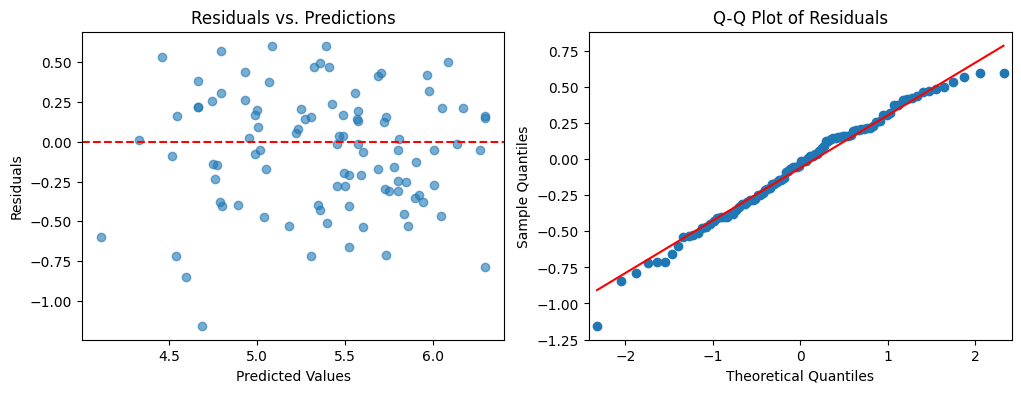

In [5]:
plt.figure(figsize=(12, 4))

# Residuals vs. Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predictions")

# Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")
plt.show()

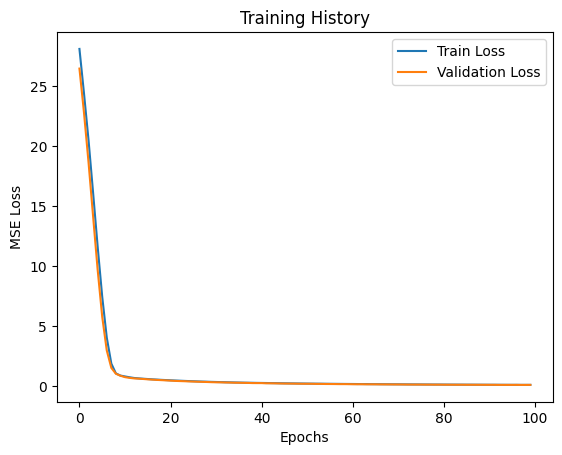

In [6]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training History")
plt.legend()
plt.show()

In [7]:
print(f"""
Optimal Hyperparameters:
- Architecture: 64 (ReLU) → 32 (ReLU) → 1 (Linear)
- Optimizer: Adam (lr=0.001)
- Batch Size: 32
- Epochs: 100
- Activation: ReLU
- Input Features: Time, Temp, Samp_15–Samp_21
""")


Optimal Hyperparameters:
- Architecture: 64 (ReLU) → 32 (ReLU) → 1 (Linear)
- Optimizer: Adam (lr=0.001)
- Batch Size: 32
- Epochs: 100
- Activation: ReLU
- Input Features: Time, Temp, Samp_15–Samp_21



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv("Your_cowpea_data.csv").drop(columns="In_Moisture")
X = df.drop(columns="Water_Absorbed")
y = df["Water_Absorbed"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[["Time", "Temp"]] = scaler.fit_transform(X_train[["Time", "Temp"]])
X_test[["Time", "Temp"]] = scaler.transform(X_test[["Time", "Temp"]])

In [9]:
# Build and train the ANN
model = Sequential([
    Dense(64, activation='relu', input_dim=9),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred = model.predict(X_test).squeeze()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [10]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
residuals = y_test - y_pred

# Akaike Information Criterion (AIC)
n_params = model.count_params()
n = len(y_test)
ssr = np.sum(residuals**2)
log_likelihood = -0.5 * n * (np.log(2 * np.pi) + np.log(ssr/n)) - 0.5 * n
aic = 2 * n_params - 2 * log_likelihood

print(f"""
Model Fitness:
- R²: {r2:.3f}
- RMSE: {rmse:.3f}
- AIC: {aic:.1f}
""")


Model Fitness:
- R²: 0.604
- RMSE: 0.388
- AIC: 5598.3



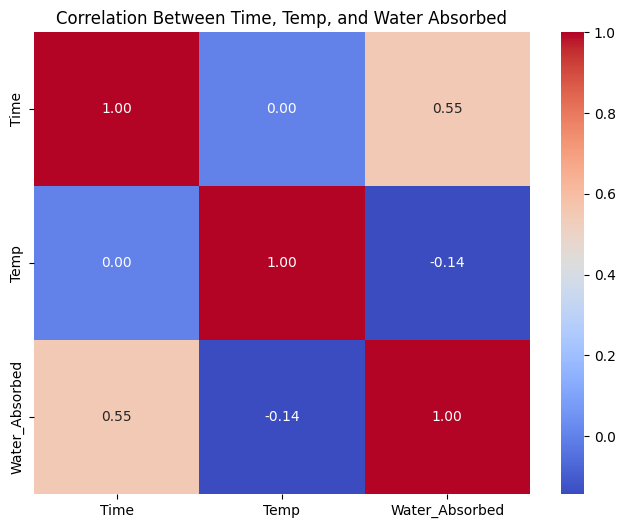

In [11]:
# Compute correlations
corr_df = df[["Time", "Temp", "Water_Absorbed"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Time, Temp, and Water Absorbed")
plt.show()

<ipython-input-12-f73d27ec44a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sample", y="Water_Absorbed", palette="Set3")


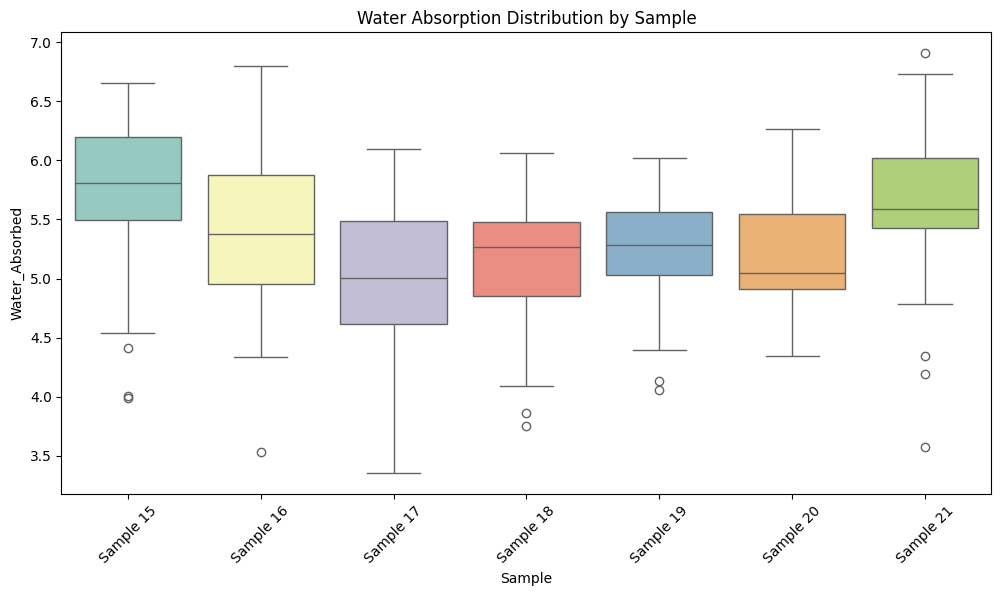

In [12]:
# Identify active sample for each row
samples = df.filter(regex='Samp_').idxmax(axis=1)
df["Sample"] = samples.str.replace("Samp_", "Sample ")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Sample", y="Water_Absorbed", palette="Set3")
plt.title("Water Absorption Distribution by Sample")
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-dc03d0db51fc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Time", y="Water_Absorbed", hue="Temp", palette="viridis", ci=None)


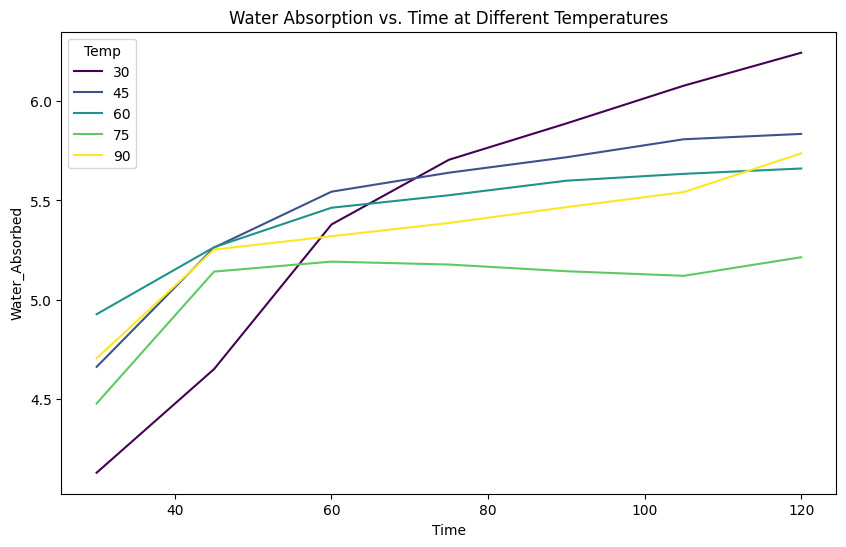

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time", y="Water_Absorbed", hue="Temp", palette="viridis", ci=None)
plt.title("Water Absorption vs. Time at Different Temperatures")
plt.show()

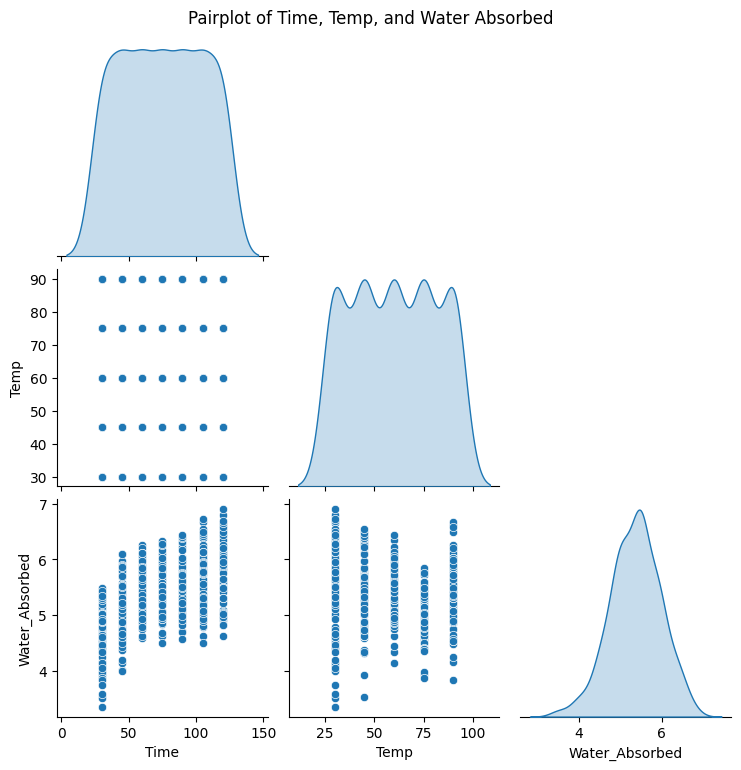

In [14]:
sns.pairplot(df[["Time", "Temp", "Water_Absorbed"]], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Time, Temp, and Water Absorbed", y=1.02)
plt.show()

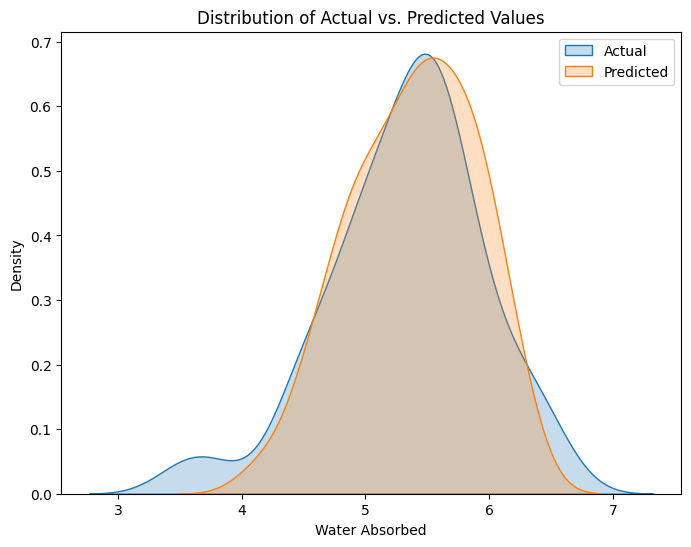

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(y_pred, label="Predicted", fill=True)
plt.xlabel("Water Absorbed")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()

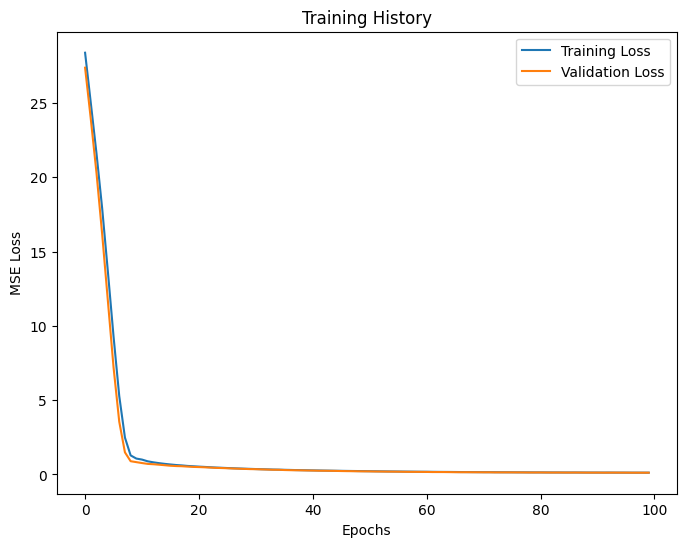

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training History")
plt.legend()
plt.show()